In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [42]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [44]:
df.shape

(768, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [49]:
df.groupby('Pregnancies')['Glucose'].mean()

Pregnancies
0     123.000000
1     112.748148
2     110.796117
3     123.586667
4     125.117647
5     118.859649
6     120.800000
7     136.444444
8     131.736842
9     131.392857
10    120.916667
11    126.454545
12    113.555556
13    125.500000
14    137.500000
15    136.000000
17    163.000000
Name: Glucose, dtype: float64

In [50]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [51]:
df.value_counts('Glucose')  

Glucose
99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: count, Length: 136, dtype: int64

In [52]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)    

In [54]:
x.shape,x_train.shape,x_test.shape

((768, 8), (614, 8), (154, 8))

In [55]:
classifier=svm.SVC(kernel='linear')

In [56]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
y_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(y_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7752442996742671


In [58]:
y_test_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(y_test_prediction,y_test)
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.7727272727272727


In [65]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix- svm Classifier ')

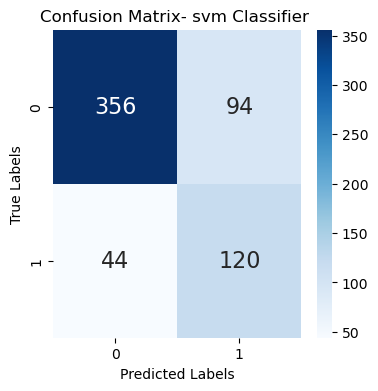

In [66]:
cm_train=confusion_matrix(y_train_prediction, y_train)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

In [67]:
import pickle

In [68]:
filename='diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))